In [2]:
import numpy as np
import matplotlib.pyplot as plt

### VIII.A. Перцептрон и многослойный перцептрон (MLP)

**Перцептрон (Perceptron):**

Простейшая модель нейрона, выполняющая бинарную классификацию.

1.  **Входные данные (Inputs):** Принимает вектор числовых признаков `x = (x1, x2, ..., xn)`.
2.  **Веса (Weights) и Смещение (Bias):** Каждому входу `xi` соответствует вес `wi`. Есть также параметр смещения `b`.
3.  **Взвешенная сумма:** Вычисляется `z = w1*x1 + w2*x2 + ... + wn*xn + b = Σ(wi*xi) + b`.
4.  **Функция активации (Activation function):** Результат `z` пропускается через пороговую (ступенчатую) функцию:
    ```
    activation(z) = 1, если z >= 0
                   = 0, если z < 0
    ```
    Выход `1` или `0` соответствует одному из двух классов.

Геометрически перцептрон реализует **линейный классификатор**, разделяя пространство признаков гиперплоскостью (`Σ(wi*xi) + b = 0`). Веса `w` определяют ориентацию гиперплоскости, смещение `b` — её положение.

**Многослойный перцептрон (MLP):**

Архитектура для решения **нелинейных** задач путем объединения перцептронов в слои. Также известен как полносвязная нейронная сеть (Feedforward Neural Network).

**Структура MLP:**

1.  **Входной слой:** Принимает входные признаки.
2.  **Скрытые слои (Hidden Layers):** Один или несколько слоев нейронов между входным и выходным. Ключевой элемент для изучения нелинейных зависимостей. Каждый нейрон слоя связан со *всеми* нейронами предыдущего слоя (полносвязность).
3.  **Выходной слой:** Генерирует конечный результат (классификация, регрессия). Количество нейронов зависит от задачи.

**Визуализация (Схема):**

```
Входной слой   Скрытый слой 1   ...   Скрытый слой N   Выходной слой
    O ---------> O ---------> ... ---------> O ---------> O
    O ---------> O ---------> ... ---------> O ---------> O
    O ---------> O ---------> ... ---------> O ---------> O
```
*   `O` – нейрон
*   Стрелки – связи с весами

**Ключевая идея:** Комбинация слоев и нелинейных функций активации (см. ниже) позволяет MLP аппроксимировать сложные функции.

---

### VIII.B. Функции активации: ReLU, Sigmoid, Tanh

**Роль:** Вводят **нелинейность** в модель, позволяя MLP изучать сложные зависимости, недоступные линейным моделям. Функция активации определяет выход нейрона на основе взвешенной суммы его входов `z`.

**Популярные функции активации:**

1.  **Sigmoid (Сигмоида):**
    *   **Формула:** `σ(z) = 1 / (1 + exp(-z))`
    *   **Диапазон:** (0, 1)
    *   **Вид:** S-образная кривая.
    *   **Применение:** Часто в выходном слое для **бинарной классификации** (интерпретация как вероятности).
    *   **Недостаток:** **Проблема затухания градиента** (Vanishing Gradient) при больших `|z|`, что замедляет обучение глубоких сетей.

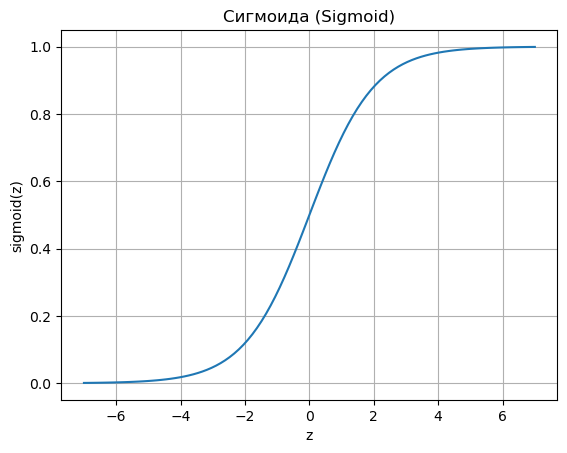

In [3]:
def sigmoid(z):
        return 1 / (1 + np.exp(-z))

z_vals = np.linspace(-7, 7, 100)
plt.plot(z_vals, sigmoid(z_vals))
plt.xlabel("z")
plt.ylabel("sigmoid(z)")
plt.title("Сигмоида (Sigmoid)")
plt.grid(True)
plt.show()

2.  **Tanh (Гиперболический тангенс):**
    *   **Формула:** `tanh(z) = (exp(z) - exp(-z)) / (exp(z) + exp(-z))` (или `np.tanh(z)`)
    *   **Диапазон:** (-1, 1)
    *   **Вид:** S-образная, центрирована около 0.
    *   **Применение:** Иногда в скрытых слоях. Центрированность может ускорить сходимость по сравнению с сигмоидой.
    *   **Недостаток:** Также подвержена **затуханию градиента**.

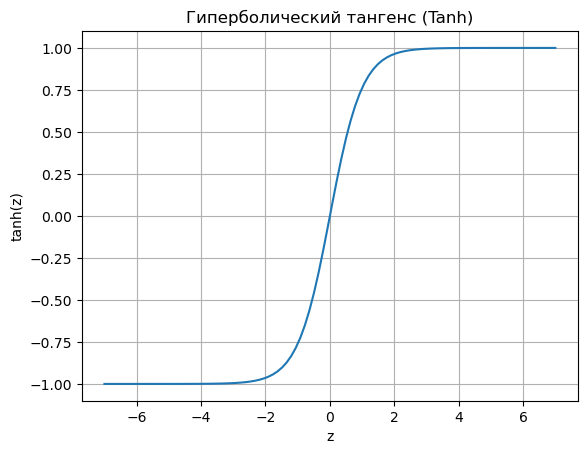

In [4]:
def tanh(z):
    return np.tanh(z)

plt.plot(z_vals, tanh(z_vals))
plt.xlabel("z")
plt.ylabel("tanh(z)")
plt.title("Гиперболический тангенс (Tanh)")
plt.grid(True)
plt.show()

3.  **ReLU (Rectified Linear Unit):**
    *   **Формула:** `ReLU(z) = max(0, z)`
    *   **Диапазон:** [0, +∞)
    *   **Вид:** Линейна для `z > 0`, ноль для `z <= 0`.
    *   **Применение:** **Стандартный выбор для скрытых слоев** в большинстве современных сетей.
    *   **Преимущества:**
        *   Борется с **затуханием градиента** (для `z > 0` градиент = 1).
        *   Вычислительно очень эффективна.
        *   Способствует разреженности активаций.
        *   Обычно обеспечивает более быструю сходимость.
    *   **Недостаток:** **Проблема "мертвых ReLU" (Dying ReLU):** Нейроны могут перестать активироваться и обучаться, если их вход стабильно отрицателен.

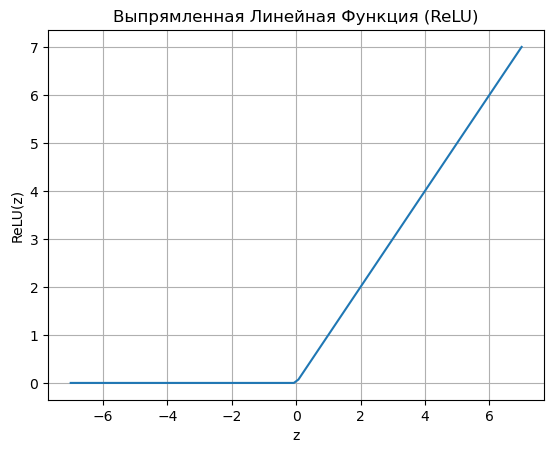

In [5]:
def relu(z):
    return np.maximum(0, z)

plt.plot(z_vals, relu(z_vals))
plt.xlabel("z")
plt.ylabel("ReLU(z)")
plt.title("Выпрямленная Линейная Функция (ReLU)")
plt.grid(True)
plt.show()

**Рекомендации по выбору:**

*   **Скрытые слои:** Начинать с **ReLU** или ее вариаций (Leaky ReLU, ELU).
*   **Выходной слой:**
    *   **Бинарная классификация:** **Sigmoid**.
    *   **Многоклассовая классификация:** **Softmax** (не рассмотрена здесь, но важна).
    *   **Регрессия:** Обычно **линейная активация** (т.е. отсутствие нелинейной активации) или ReLU/другие, в зависимости от диапазона целевой переменной.

---

### VIII.C. Обратное распространение ошибки (Backpropagation)

**Назначение:** Основной алгоритм для **обучения** многослойных нейронных сетей путем **эффективного вычисления градиентов** функции потерь по всем весам сети.

**Общий процесс обучения:**

1.  **Прямой проход (Forward Pass):** Входные данные проходят через сеть, вычисляется предсказание.
2.  **Вычисление ошибки (Loss Calculation):** Предсказание сравнивается с истинным значением с помощью функции потерь (Loss Function).
3.  **Обратный проход (Backward Pass / Backpropagation):**
    *   Вычисляется градиент функции потерь по отношению к выходу последнего слоя.
    *   Этот градиент **распространяется обратно** через слои сети с использованием **цепного правила (Chain Rule)** дифференцирования.
    *   На каждом слое вычисляются градиенты потерь по отношению к параметрам этого слоя (весам `W` и смещениям `b`) и к его входам.
4.  **Обновление весов (Weight Update):** Веса и смещения сети корректируются в направлении **антиградиента** с помощью **градиентного спуска** (или его вариаций, см. Оптимизаторы), чтобы минимизировать ошибку.
    *   `W_new = W_old - learning_rate * ∂L/∂W`
    *   `b_new = b_old - learning_rate * ∂L/∂b`
5.  **Повторение:** Шаги 1-4 повторяются много раз (эпохи) на обучающих данных.

**Ключевые концепции Backpropagation:**

*   **Цепное правило (Chain Rule):** Позволяет вычислить производную сложной функции (нейросеть как композиция функций слоев) через произведение производных ее составных частей (слоев). `∂L/∂W_i = (∂L/∂a_n) * (∂a_n/∂a_{n-1}) * ... * (∂a_{i+1}/∂a_i) * (∂a_i/∂W_i)`.
*   **Градиентный спуск (Gradient Descent):** Итеративный метод оптимизации, использующий градиенты для поиска минимума функции потерь. Шаг делается в направлении наискорейшего убывания функции (антиградиент).

**Математическая суть Backpropagation:**

Алгоритм эффективно применяет цепное правило для вычисления частных производных `∂L/∂W` и `∂L/∂b` для всех `W` и `b` в сети. Он работает "слой за слоем" в обратном направлении:

1.  Вычислить градиент `∂L/∂ŷ` на выходе.
2.  Распространить градиент назад к выходу последнего слоя `∂L/∂o`.
3.  Вычислить градиенты по параметрам последнего слоя `∂L/∂W_n`, `∂L/∂b_n` и градиент по его входу `∂L/∂a_{n-1}`.
4.  Повторять шаг 3 для предыдущих слоев, используя уже вычисленный `∂L/∂a_i` для расчета `∂L/∂W_i`, `∂L/∂b_i` и `∂L/∂a_{i-1}`.

**Проблемы с градиентами при Backpropagation:**

1.  **Затухающие градиенты (Vanishing Gradients):**
    *   **Описание:** Градиенты становятся экспоненциально малыми при распространении вглубь сети (к ранним слоям).
    *   **Причины:** Функции активации с производными < 1 (Sigmoid, Tanh), умножение малых чисел в цепном правиле.
    *   **Последствия:** Медленное или отсутствующее обучение ранних слоев, неспособность сети улавливать долгосрочные зависимости.
2.  **Взрывающиеся градиенты (Exploding Gradients):**
    *   **Описание:** Градиенты становятся экспоненциально большими.
    *   **Причины:** Большие значения весов, производные >= 1.
    *   **Последствия:** Нестабильность обучения (резкие скачки потерь), расходимость, появление NaN.

**Решения проблем с градиентами:**

*   **Использование ReLU и ее вариаций:** Их производная = 1 для положительных входов, что предотвращает затухание.
*   **Правильная инициализация весов:** Методы Xavier/Glorot или He (см. VI.G).
*   **Batch Normalization (BatchNorm):** Стабилизирует активации и градиенты (см. VI.E).
*   **Gradient Clipping:** Ограничение максимального значения градиентов для борьбы со взрывом.
*   **Использование архитектур типа LSTM/GRU:** Специально разработаны для борьбы с затуханием градиентов в рекуррентных сетях (см. VI.F).

---

### VIII.E. BatchNorm и Dropout

Техники для улучшения обучения и предотвращения переобучения.

**1. BatchNorm (Batch Normalization):**

*   **Идея:** Нормализовать выходы слоя *перед* функцией активации в каждом мини-батче во время обучения.
*   **Механизм:**
    1.  Вычислить среднее `μ_B` и дисперсию `σ^2_B` активаций слоя в текущем мини-батче `B`.
    2.  Нормализовать активации: `x_hat = (x - μ_B) / √(σ^2_B + ε)`.
    3.  Масштабировать и сдвинуть: `y = γ * x_hat + β`. Параметры `γ` (масштаб) и `β` (сдвиг) являются *обучаемыми*.
*   **Преимущества:**
    *   **Ускоряет обучение:** Позволяет использовать более высокие скорости обучения (learning rates), стабилизирует градиенты.
    *   **Уменьшает проблему внутреннего сдвига ковариат** (Internal Covariate Shift): Стабилизирует распределение входов для следующих слоев.
    *   **Снижает чувствительность к инициализации весов.**
    *   **Небольшой эффект регуляризации.**
    *   **Помогает с проблемами vanishing/exploding gradients.**
*   **Использование:** Обычно между линейным/сверточным слоем и функцией активации (`Linear/Conv -> BatchNorm -> Activation`).
*   **Важно:** Во время *inference* (применения модели) используются не статистики батча, а *скользящие средние* `μ` и `σ^2`, вычисленные во время обучения.

**2. Dropout:**

*   **Идея:** Техника **регуляризации** для предотвращения **переобучения (overfitting)**.
*   **Механизм (во время обучения):**
    *   Для каждого нейрона в слое (обычно полносвязном) с вероятностью `p` (dropout rate, например, 0.5) его выход **обнуляется** на данном шаге прямого и обратного распространения.
    *   Выходы оставшихся нейронов масштабируются на `1 / (1 - p)` (inverted dropout) для сохранения ожидаемого значения суммы выходов.
*   **Механизм (во время inference):** Dropout **отключается**, все нейроны используются.
*   **Преимущества:**
    *   **Сильная регуляризация:** Заставляет нейроны учить более робастные признаки, не полагаясь на конкретные другие нейроны.
    *   **Снижает коадаптацию нейронов.**
    *   Можно интерпретировать как обучение **ансамбля** подсетей с общими весами.
*   **Использование:** Обычно **после функции активации** в полносвязных слоях (`Activation -> Dropout -> Linear`).

**Совместное использование:** BatchNorm и Dropout часто используются вместе, но их взаимодействие может быть сложным. Порядок их применения может влиять на результат.

---

### VIII.F. Архитектуры нейронных сетей (обзорно)

Разные типы сетей, оптимизированные для разных типов данных и задач.

**1. Convolutional Neural Networks (CNN) – Сверточные НС:**

*   **Назначение:** Обработка данных с **пространственной структурой** (изображения, видео, сигналы).
*   **Ключевые компоненты:**
    *   **Сверточные слои (Convolutional Layers):** Применяют **фильтры (ядра)** для извлечения локальных признаков (границы, текстуры). Используют **разделение параметров (parameter sharing)**: один фильтр применяется ко всему входу.
    *   **Пулинг слои (Pooling Layers):** Уменьшают пространственный размер карт признаков (downsampling), делая представление более компактным и инвариантным к небольшим сдвигам (например, Max Pooling).
    *   **Полносвязные слои (Dense/Fully Connected Layers):** Обычно используются в конце сети для классификации на основе извлеченных признаков.
*   **Преимущества:** Эффективное извлечение иерархических признаков, учет локальной структуры, инвариантность к сдвигам, меньшее число параметров по сравнению с MLP для изображений.
*   **Применение:** Классификация/детекция/сегментация изображений, распознавание лиц, медицинский анализ и др.

**2. Recurrent Neural Networks (RNN) – Рекуррентные НС:**

*   **Назначение:** Обработка **последовательных данных** (текст, речь, временные ряды), где важен порядок.
*   **Ключевая идея:** Наличие **рекуррентной связи**: выход сети на шаге `t` зависит от входа `x_t` и **скрытого состояния (hidden state)** `h_{t-1}` с предыдущего шага. `h_t = activation(W_xh * x_t + W_hh * h_{t-1} + b_h)`. Состояние `h_t` несет информацию о предыдущих элементах последовательности ("память"). Используется **разделение параметров** во времени.
*   **Преимущества:** Способность моделировать зависимости в последовательностях, обрабатывать входы переменной длины.
*   **Недостаток:** Трудности с обучением на **длинных последовательностях** из-за **затухания/взрыва градиентов**.
*   **Применение:** Обработка естественного языка (NLP), машинный перевод, генерация текста, распознавание речи, анализ временных рядов.

**3. Long Short-Term Memory (LSTM) – Сети долгой краткосрочной памяти:**

*   **Назначение:** Улучшенная версия RNN, специально разработанная для решения проблемы **затухания градиентов** и лучшей работы с **длинными последовательностями**.
*   **Ключевая идея:** Более сложный рекуррентный блок с **ячейкой памяти (cell state)** `c_t` и тремя **вентилями (gates)**:
    *   **Forget Gate:** Решает, какую информацию *стереть* из ячейки памяти.
    *   **Input Gate:** Решает, какую новую информацию *записать* в ячейку.
    *   **Output Gate:** Решает, какую часть ячейки памяти *выдать* наружу (в скрытое состояние `h_t`).
    Вентили управляют потоком информации, позволяя LSTM выборочно запоминать или забывать информацию на длительных интервалах.
*   **Преимущества:** Эффективное моделирование долгосрочных зависимостей, решение проблемы затухания градиентов.
*   **Применение:** Задачи NLP (особенно сложные), распознавание речи, генерация музыки, анализ временных рядов с долгими зависимостями.
*   **Вариант:** GRU (Gated Recurrent Unit) – упрощенная версия LSTM, часто со схожей эффективностью.

**Выбор архитектуры:** Зависит от типа данных: MLP для табличных/векторных, CNN для пространственных, RNN/LSTM/GRU для последовательных.

---


### VIII.G. Методы инициализации весов: Xavier/Glorot, He

**Проблема:** Неправильная инициализация весов может привести к:
*   **Нулевая инициализация:** Все нейроны обучаются одинаково (нарушение симметрии не происходит), сеть не учится.
*   **Слишком малые/большие случайные значения:** Могут вызвать затухание/взрыв градиентов и замедлить или остановить обучение.

**Цель правильной инициализации:** Поддерживать дисперсию активаций и градиентов примерно постоянной на разных слоях сети в начале обучения.

**Популярные методы:**

1.  **Xavier/Glorot Initialization:**
    *   **Предположение:** Для активаций типа **Sigmoid** или **Tanh**.
    *   **Идея:** Масштабирует веса в зависимости от числа нейронов на входе (`n_in` или `fan_in`) и выходе (`n_out` или `fan_out`) слоя.
    *   **Формула (Normal):** Инициализация из нормального распределения со средним 0 и стд. отклонением `sqrt(2 / (n_in + n_out))`.
    *   **Формула (Uniform):** Инициализация из равномерного распределения в диапазоне `[-sqrt(6 / (n_in + n_out)), sqrt(6 / (n_in + n_out))]`.

2.  **He Initialization (Kaiming Initialization):**
    *   **Предположение:** Специально для активаций типа **ReLU** и ее вариаций.
    *   **Идея:** Учитывает, что ReLU обнуляет около половины активаций. Масштабирует веса в зависимости *только* от числа нейронов на входе (`n_in`).
    *   **Формула (Normal):** Инициализация из нормального распределения со средним 0 и стд. отклонением `sqrt(2 / n_in)`.
    *   **Формула (Uniform):** Инициализация из равномерного распределения в диапазоне `[-sqrt(6 / n_in), sqrt(6 / n_in)]`.

**Рекомендации:**

*   Используйте **He initialization** для слоев с **ReLU**-подобными активациями.
*   Используйте **Xavier/Glorot initialization** для слоев с **Sigmoid/Tanh**.
*   Современные фреймворки (PyTorch, TensorFlow) часто используют подходящую инициализацию (например, He) по умолчанию для стандартных слоев.

---

Этот оптимизированный конспект удаляет повторения и излишние аналогии, сохраняя ключевую теорию и форматируя формулы и код. Он должен быть более компактным и структурированным.